In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import numpy.typing as npt
import pytest
import sympy
from networkx.classes import DiGraph
from pydrake.math import eq, ge, le
from pydrake.solvers import MathematicalProgram, Solve

from gcs_facial_reduction.facial_reduction import (
    draw_graph,
    get_graph_description,
    graph_to_standard_form,
    graph_to_standard_form_with_flow_limits,
    run_facial_reduction,
    simplify_graph_from_fr_result,
    solve_facial_reduction_auxiliary_prob,
)
from gcs_facial_reduction.facial_reduction import run_fr_on_graph_and_visualize

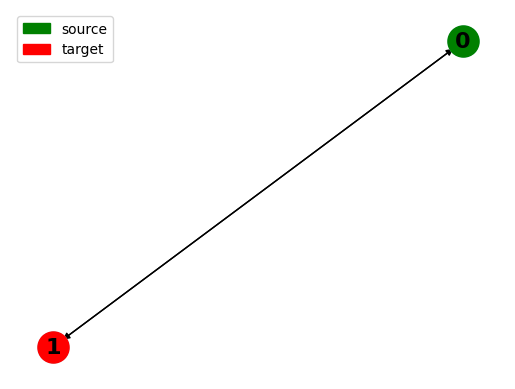

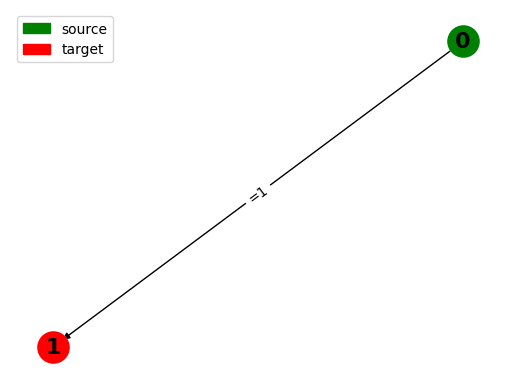

In [2]:
G = nx.DiGraph()

G.add_node(0)
G.add_node(1)

G.add_edge(0, 1)
G.add_edge(1, 0)

source = 0
target = 1

run_fr_on_graph_and_visualize(G, source, target)

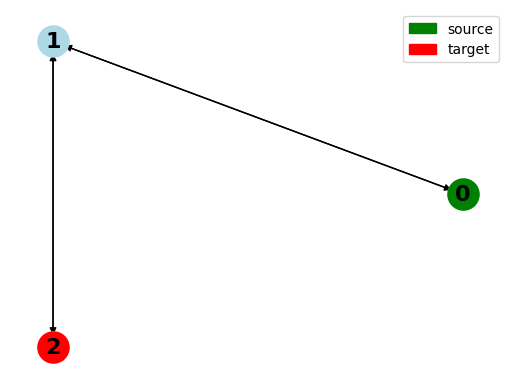

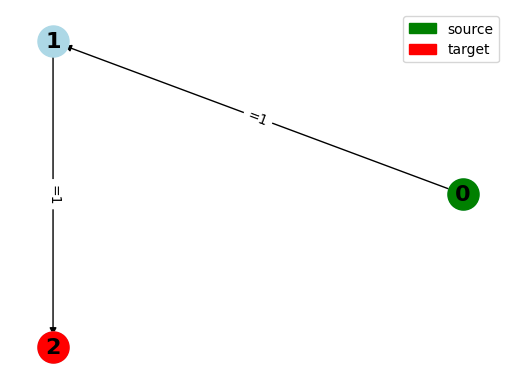

In [3]:
G = nx.DiGraph()

G.add_node(0)
G.add_node(1)
G.add_node(2)

G.add_edge(0, 1)
G.add_edge(1, 0)
G.add_edge(1, 2)
G.add_edge(2, 1)

source = 0
target = 2

run_fr_on_graph_and_visualize(G, source, target)

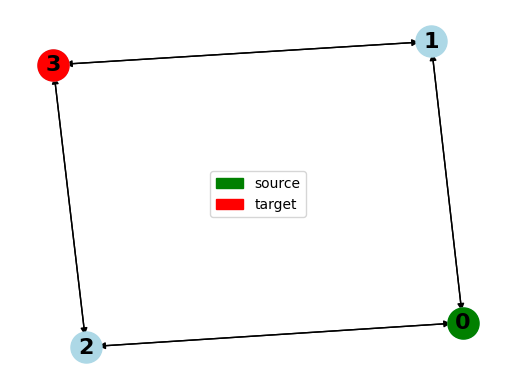

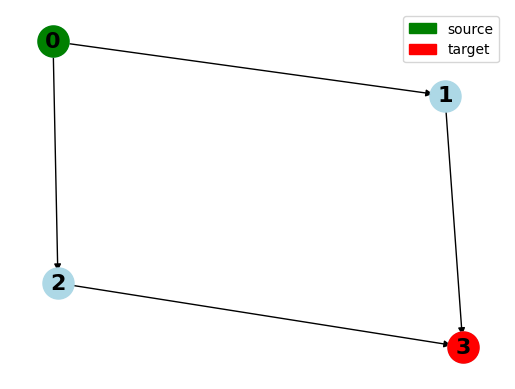

In [4]:
G = nx.DiGraph()

G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)

G.add_edge(0, 1)
G.add_edge(1, 3)
G.add_edge(0, 2)
G.add_edge(2, 3)

G.add_edge(1, 0)
G.add_edge(3, 1)
G.add_edge(2, 0)
G.add_edge(3, 2)

source = 0
target = 3

run_fr_on_graph_and_visualize(G, source, target, "random")

Note: Facial reduction does not realize that the two flows along each path must be equal

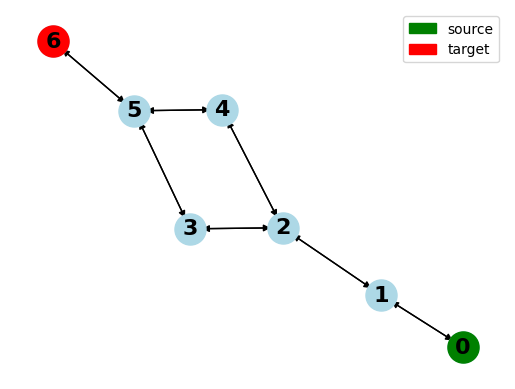

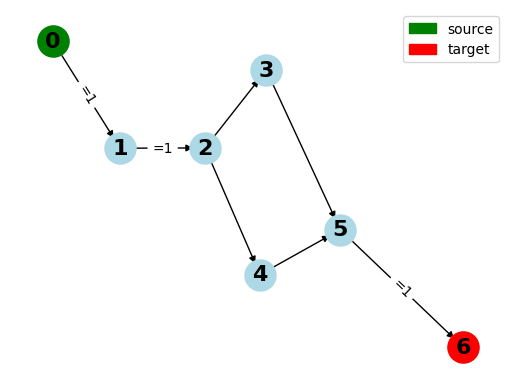

In [5]:
G = nx.DiGraph()

G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

G.add_edge(0, 1)
G.add_edge(1, 0)
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(3, 2)
G.add_edge(2, 4)
G.add_edge(4, 2)
G.add_edge(3, 5)
G.add_edge(5, 3)
G.add_edge(4, 5)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 5)


source = 0
target = 6

run_fr_on_graph_and_visualize(G, source, target, "random")

### Example from GCS Motion Planning paper:
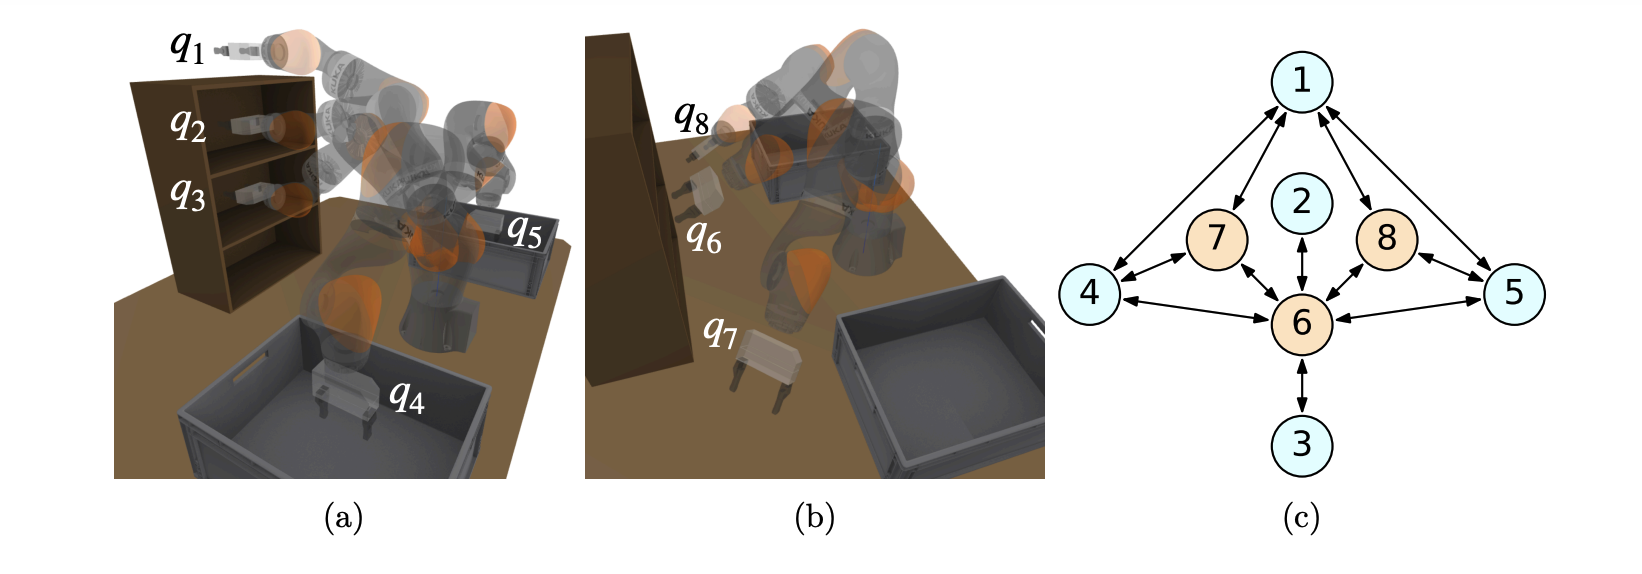

Source attached to 2
Target attached to 3

Path must be (source, 2, 6, 3, target)

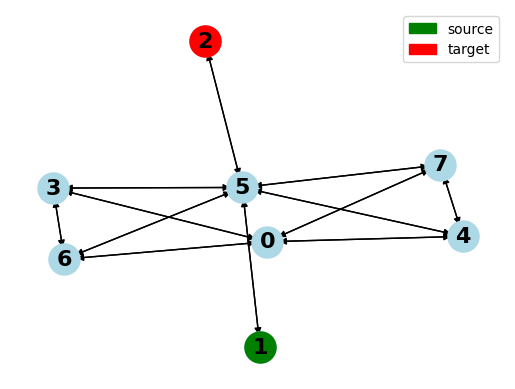

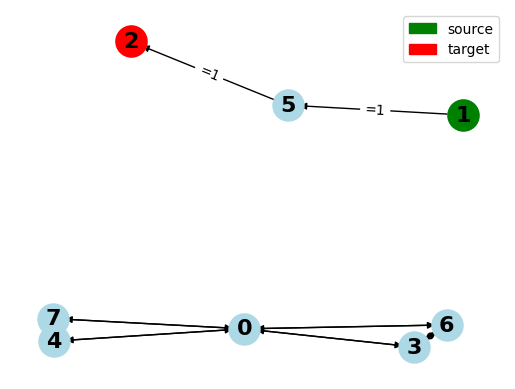

In [6]:
G = nx.DiGraph()

G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)

G.add_edge(0, 3)
G.add_edge(0, 6)
G.add_edge(0, 7)
G.add_edge(0, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(5, 6)
G.add_edge(3, 5)
G.add_edge(5, 7)
G.add_edge(7, 4)
G.add_edge(5, 2)
G.add_edge(5, 4)

for (u,v) in list(G.edges()):
    G.add_edge(v,u)

source = 1
target = 2

run_fr_on_graph_and_visualize(G, source, target, "random")

(Notice that idxs are shifted by 1)